# KNN Model For Car Plates Recognition

In [70]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

import os
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread


In [71]:
# Extra Import

import warnings

warnings.filterwarnings('ignore')

## Import Dataset

In [72]:
# dir_path = 'CNN letter Dataset'
dir_path = 'Train'
digits = sorted(os.listdir(dir_path))
# digits=[digit[-1] for digit in digits]
NUM_CLASSES = len(digits)
print(digits)
print('Number of classes (letters and digits): ', NUM_CLASSES)

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_A', 'class_B', 'class_C', 'class_D', 'class_E', 'class_F', 'class_G', 'class_H', 'class_I', 'class_J', 'class_K', 'class_L', 'class_M', 'class_N', 'class_O', 'class_P', 'class_Q', 'class_R', 'class_S', 'class_T', 'class_U', 'class_V', 'class_W', 'class_X', 'class_Y', 'class_Z']
Number of classes (letters and digits):  36


In [73]:
digits_counter = {}
NUM_IMAGES = 0

for digit in digits:
    path = os.path.join(dir_path, digit)
    digits_counter[digit] = len(os.listdir(path))
    NUM_IMAGES += len(os.listdir(path))

print(digits_counter)
print('Number of all images: ', NUM_IMAGES)


{'class_0': 24, 'class_1': 24, 'class_2': 24, 'class_3': 24, 'class_4': 24, 'class_5': 24, 'class_6': 24, 'class_7': 24, 'class_8': 24, 'class_9': 24, 'class_A': 24, 'class_B': 24, 'class_C': 24, 'class_D': 24, 'class_E': 24, 'class_F': 24, 'class_G': 24, 'class_H': 24, 'class_I': 24, 'class_J': 24, 'class_K': 24, 'class_L': 24, 'class_M': 24, 'class_N': 24, 'class_O': 24, 'class_P': 24, 'class_Q': 24, 'class_R': 24, 'class_S': 24, 'class_T': 24, 'class_U': 24, 'class_V': 24, 'class_W': 24, 'class_X': 24, 'class_Y': 24, 'class_Z': 24}
Number of all images:  864


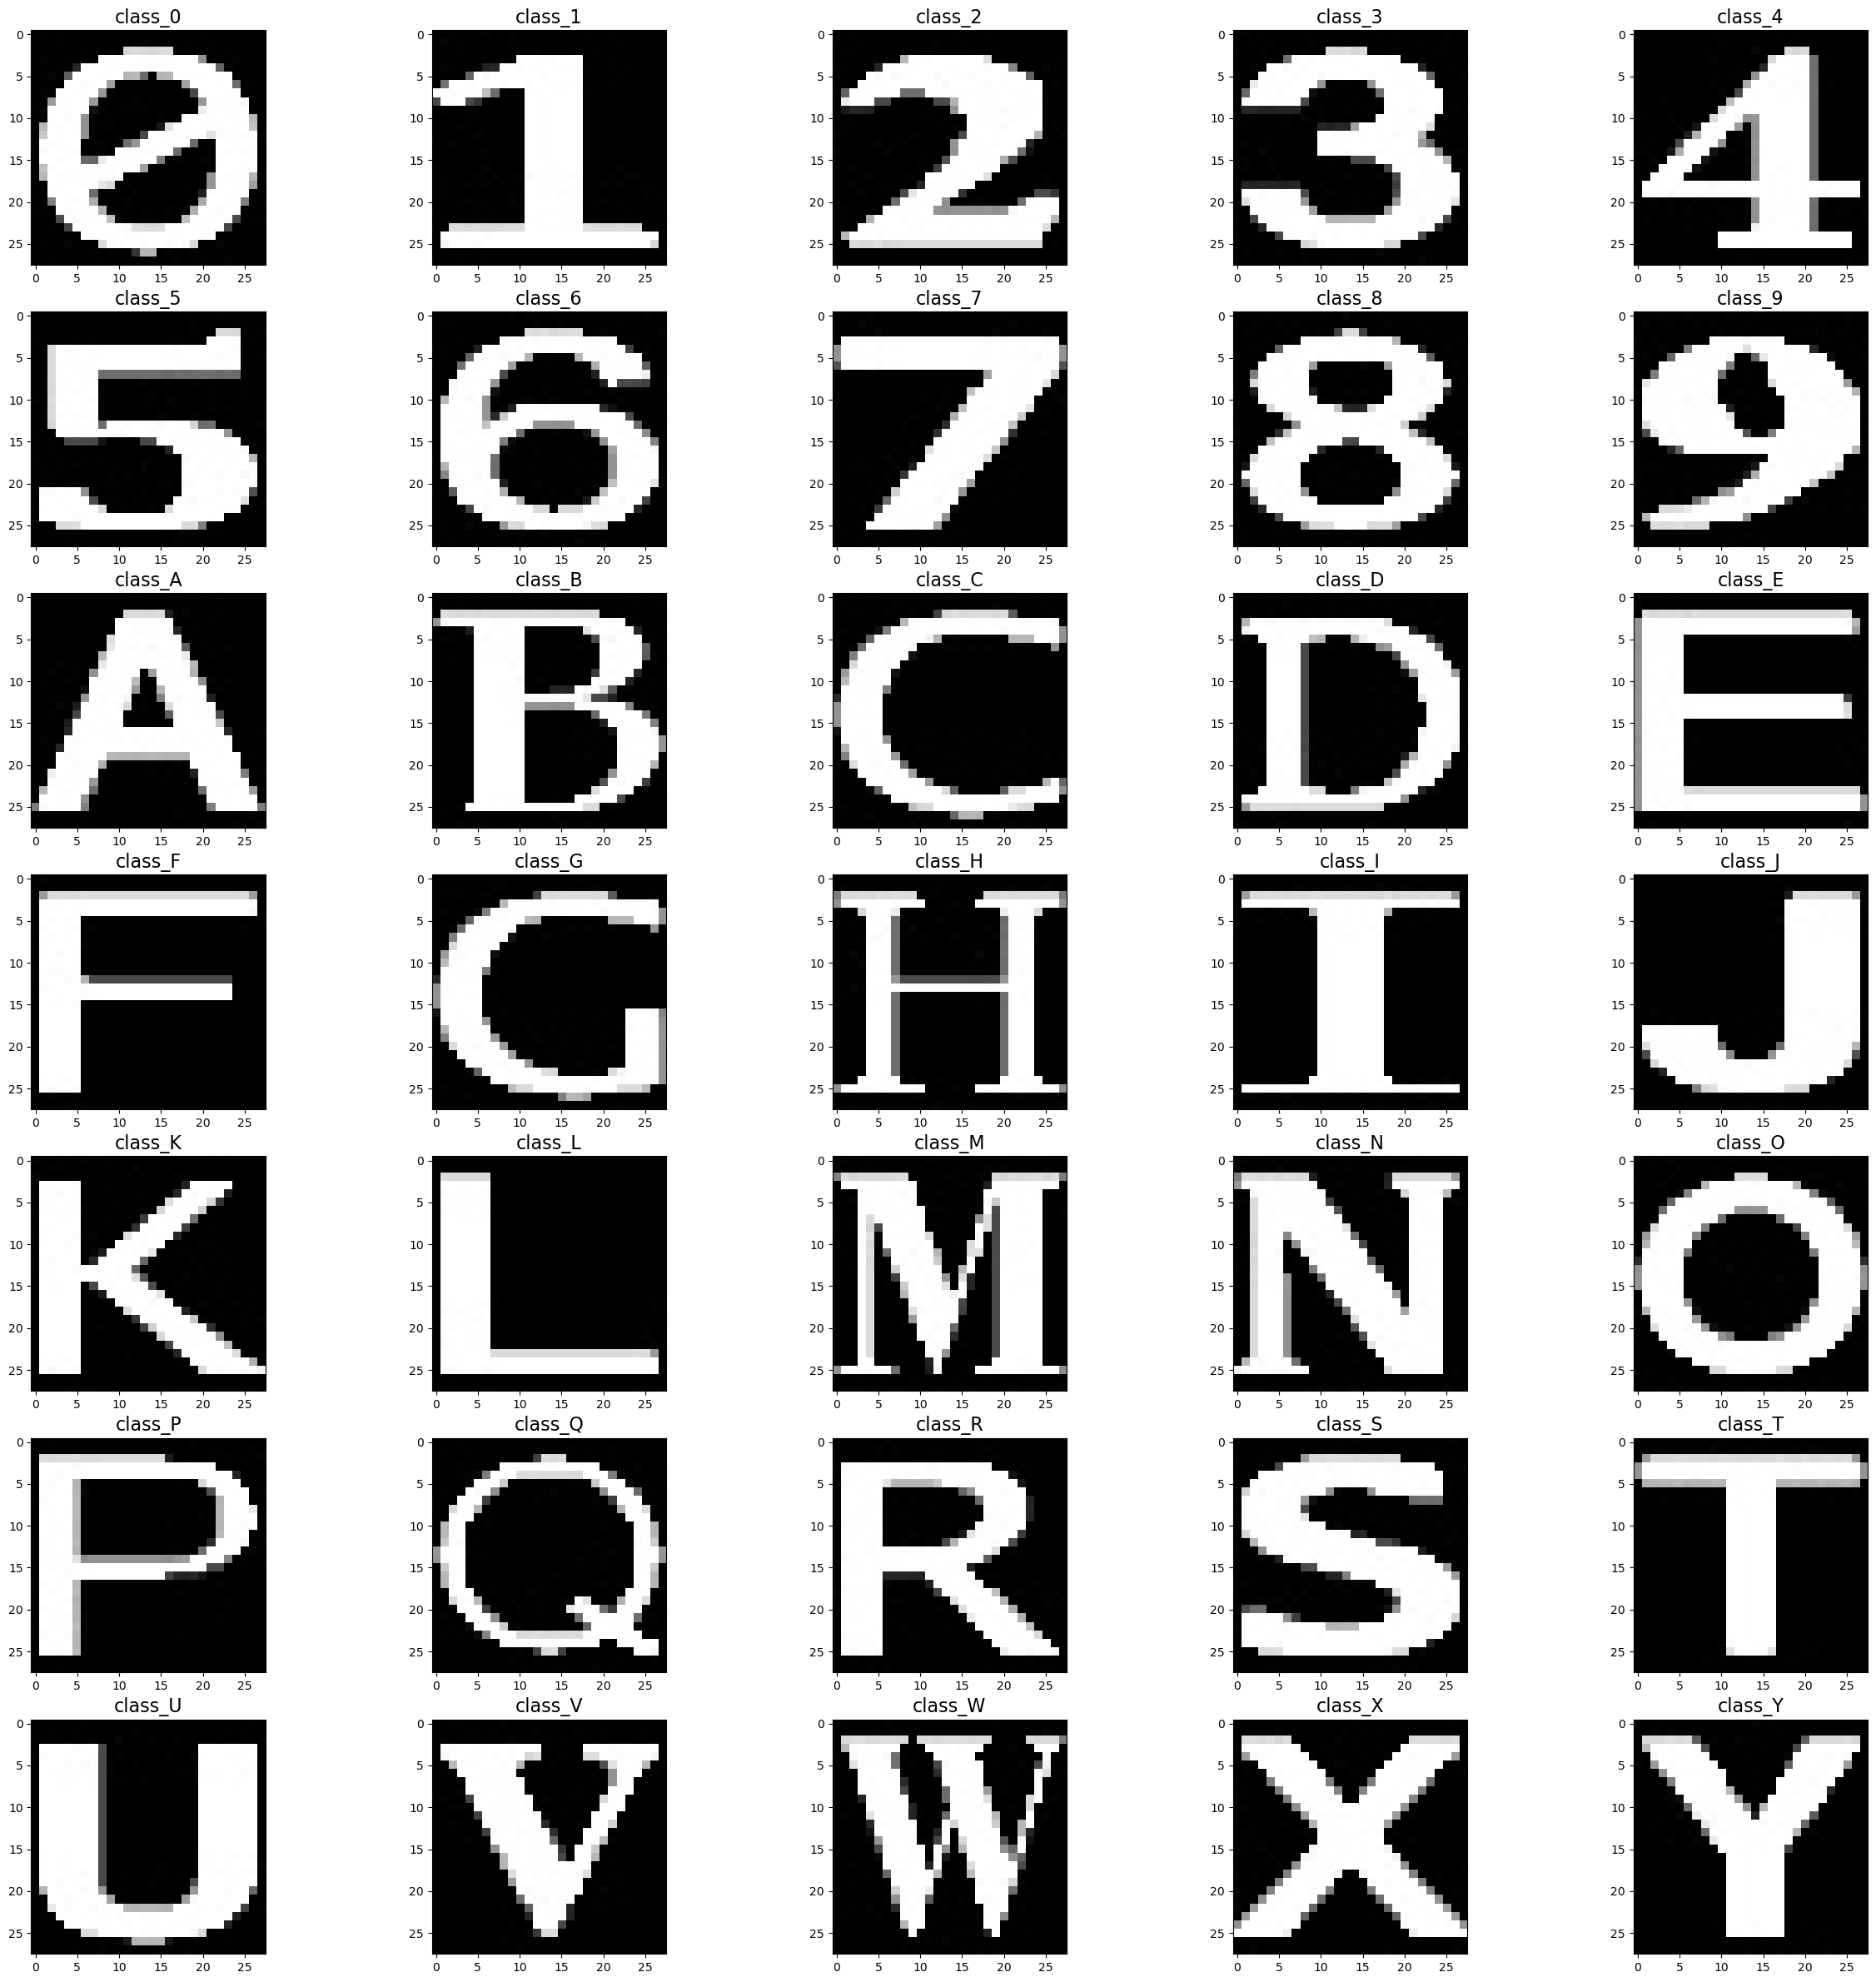

In [74]:
rows, columns = 7, 5

k = 0
fig, axes = plt.subplots(rows, columns, figsize=(30, 30))
for row in range(rows):
    for column in range(columns):
        rand_num = np.random.randint(0, digits_counter[digits[k]])
        class_path = dir_path + '/' + str(digits[k])
        image_path = class_path + '/' + str(os.listdir(class_path)[rand_num])
        ax = axes[row, column]
        ax.set_title(digits[k], loc='center', fontsize=16)
        ax.imshow(imread(image_path), cmap='gray')
        k += 1
plt.show()

In [75]:
data = []
labels = []
MAX_NUM = None   # maximum number of digits images per class
IMG_WIDTH, IMG_HEIGHT = 32, 40

# images of digits '6' in folder with '2'
incorrect_img = [
    'aug20121_0.jpg',
    'aug20122_1.jpg',
    'aug20123_2.jpg',
    'aug20124_3.jpg',
    'aug20125_4.jpg',
    'aug20126_5.jpg',
    'aug20127_6.jpg',
    'aug20128_7.jpg',
    'aug20129_8.jpg',
    'aug20130_9.jpg'
]

for digit in digits:
    path = os.path.join(dir_path, digit)
    label = digits.index(digit)
    for img in os.listdir(path):
        if img in incorrect_img:
            continue
        img_path = os.path.join(path, img)
        img_array = cv.imread(img_path)
        resized = cv.resize(img_array, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv.INTER_AREA)
        gray = cv.cvtColor(resized, cv.COLOR_RGB2GRAY)        
        data.append(gray)
        labels.append(label)
        if MAX_NUM is not None:
            if labels.count(label) == MAX_NUM:
                break

data = np.array(data, dtype='float32')
labels = np.array(labels, dtype='int8')

In [76]:
print(data.shape)


(864, 40, 32)


In [77]:
data = data / 255.0
# data = data.reshape(*data.shape, 1)
print(data.shape)
print(labels.shape)

(864, 40, 32)
(864,)


## Split DataSet

In [78]:
from sklearn.model_selection import train_test_split
nsamples, nx, ny = data.shape
d2_train_dataset = data.reshape((nsamples,nx*ny))

X_train, X_test, y_train, y_test = train_test_split(d2_train_dataset, labels, test_size=0.25)

In [79]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# create an instance of the classifier
knn_default= KNeighborsClassifier(n_neighbors=5)

# knn_default.fit(X_train, y_train)
# y_pred = knn_default.predict(X_test)


# fit the model and perform cross validation
knn_default = KNeighborsClassifier()
cv_scores = cross_val_score(knn_default, X_train, y_train, cv=5, scoring="accuracy")
# take the average of the scores of different folds
final_score_default = np.mean(cv_scores)
print("Accuracy with defaul KNN:", final_score_default)

Accuracy with defaul KNN: 0.9490876565295169


## Train Model

## Calculate Accuracy

## Save and Use Model | Predict